**TITULO**: Estudio de Startups Unicornio: Concentración, Sectores y Crecimiento

**TEMA**: Análisis de la concentración geográfica y sectorial del surgimiento de startups unicornio a nivel mundial, y su relación con indicadores económicos.

**HIPOTESIS PRINCIPAL**: El surgimiento de empresas unicornio se ha concentrado en ciertas industrias y regiones del mundo, reflejando patrones de innovación y crecimiento económico desiguales.

**Subhipotesis 1**: La mayoría de las empresas unicornio se concentran en un pequeño número de países, especialmente en EE.UU. y China. (CONCENTRACION GLOBAL).

**Subhipotesis 2**: El sector fintech ha producido más unicornios que cualquier otro sector entre 2010 y 2022. (SECTOR DOMINANTE).

**Subhipotesis 3**: Las startups más valoradas alcanzaron el estatus de unicornio en menos de 6 años desde su fundación. (VELOCIDAD DE CRECIMIENTO).

**Subhipotesis 4**: El número de startups unicornio ha crecido de manera exponencial entre 2013 y 2022. (VELOCIDAD DE CRECIMIENTO).

**Subhipotesis 5**: La presencia de unicornios en un país está positivamente correlacionada con su Producto Interno Bruto (PIB) - (IMPACTO ECONOMICO).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#SE COMENZO A TRABAJAR CON ESTE DATAFRAME, PERO SE OBSERVO QUE HABIAN MUCHOS VALORES CUALITATIVOS Y FALTABAN ALGUNOS CUANTITATIVOS 
# POR LO QUE SE HIZO UNA BUSQUEDA DE UN DATAFRAME CON MAS DATOS Y DESCARTAMOS ESTE.
DF_PRUEBA = pd.read_csv(r'C:\Users\Gilberto\Desktop\proyecto-unicornios\data\DESCARTADO POR FALTA DE INFORMACION.csv')

In [3]:
DF_PRUEBA.head(3)

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"


In [4]:
#IMPORTAMOS EL DATASET QUE HEMOS ENCONTRADO DE LAS STARTUPS UNICORN
df_base = pd.read_csv(r'C:\Users\Gilberto\Desktop\proyecto-unicornios\data\unicorn_2022.csv')

In [5]:
#HACEMOS UNA VISTA DE LAS COLUMNAS Y FILAS QUE TENEMOS
df_base

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,$1B,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,$1B,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings"
1071,Zihaiguo,$1B,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ..."
1072,Zopa,$1B,2021-10-19,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North..."


In [6]:
#PEDIMOS INFORMACION PARA VER SI TENEMOS TODOS LOS CAMPOS RELLENOS O NO
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [7]:
#SUMAMOS TODOS LOS NULL PARA SABER QUE CANTIDAD HAY EN CADA COLUMNA
print(df_base.isnull().sum())

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country              0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
dtype: int64


In [8]:
#SACAMOS EL PORCENTAJE PARA SABER CON RESPECTO AL TOTAL SI HAY MUCHOS NULOS O NO, A COMPROBAR QUE HAY MUY POCOS
#SE TOMA LA DECISION DE RELLENAR ESOS VALORES PORQUE EL PORCENTAJE ES MUY BAJO
print(df_base.isnull().mean() * 100)

Company             0.000000
Valuation           0.000000
Date Joined         0.000000
Industry            0.000000
City                1.489758
Country             0.000000
Continent           0.000000
Year Founded        0.000000
Funding             0.000000
Select Investors    0.093110
dtype: float64


In [9]:
df_base["City"] = df_base["City"].fillna("Unknown")

In [10]:
df_base["Select Investors"] = df_base["Select Investors"].fillna("Unknown")

In [11]:
#COMPROBAMOS QUE YA NO TENGA VALORES FALTANTES EN MI DATAFRAME
df_base.isnull().sum()

Company             0
Valuation           0
Date Joined         0
Industry            0
City                0
Country             0
Continent           0
Year Founded        0
Funding             0
Select Investors    0
dtype: int64

In [12]:
#HACEMOS UNA VISTA DE LOS PAISES QUE TENEMOS Y 
df_base["Country"].unique()

array(['China', 'United States', 'Sweden', 'Australia', 'United Kingdom',
       'Bahamas', 'India', 'Indonesia', 'Turkey', 'Estonia', 'Germany',
       'Hong Kong', 'South Korea', 'Mexico', 'Canada', 'Netherlands',
       'France', 'Finland', 'Israel', 'Lithuania', 'Denmark', 'Belgium',
       'Colombia', 'Brazil', 'Singapore', 'Austria', 'Ireland',
       'United Arab Emirates', 'Switzerland', 'Vietnam', 'South Africa',
       'Thailand', 'Norway', 'Chile', 'Argentina', 'Bermuda', 'Japan',
       'Spain', 'Malaysia', 'Senegal', 'Philippines', 'Luxembourg',
       'Nigeria', 'Czech Republic', 'Croatia', 'Italy'], dtype=object)

In [13]:
df_base["Country"].nunique()

46

In [14]:
#CONVERTIMOS LA COLUMNA DATE JOINED EN TIPO FECHA PARA ASEGURARNOS QUE LO PODEMOS USAR MAS ADELANTE
df_base["Date Joined"] = pd.to_datetime(df_base["Date Joined"], errors="coerce")

In [15]:
#HACEMOS UN CALCULO DEL TIEMPO EN QUE TARDO UNA STARTUPS UNICORNIO EN LLEGAR A ESE STATUS RESTANDO CUANDO SE FUNDO HASTA CUANDO SE CONSIDERO UNICORNIO
df_base["Years to Unicorn"] = df_base["Date Joined"].dt.year - df_base["Year Founded"]

In [16]:
#HACEMOS UNA VISTA QUE TODOO HAYA FUNCIONADO BIEN.
df_base[["Company", "Year Founded", "Date Joined", "Years to Unicorn"]].head(5)

,Company,Year Founded,Date Joined,Years to Unicorn
0,Bytedance,2012,2017-04-07,5
1,SpaceX,2002,2012-12-01,10
2,SHEIN,2008,2018-07-03,10
3,Stripe,2010,2014-01-23,4
4,Klarna,2005,2011-12-12,6


In [17]:
#HACEMOS UN CONTEO DE CUANTOS UNICORNIOS HAY POR PAISES
unicorns_por_pais = df_base["Country"].value_counts()
unicorns_por_pais.head(10)

Country
United States     562
China             173
India              65
United Kingdom     43
Germany            26
France             24
Israel             20
Canada             19
Brazil             16
Singapore          12
Name: count, dtype: int64

In [18]:
# SACAMOS EL TOTAL DE LAS FILAS
total_unicornios = df_base.shape[0]

In [19]:
#SACAMOS EL PORCENTRAJE DEL TOP 2
porcentaje_top = (unicorns_por_pais / total_unicornios) * 100

In [20]:
porcentaje_top.head(2)

Country
United States    52.327747
China            16.108007
Name: count, dtype: float64

In [21]:
total_unicornios

1074

C:\Users\Gilberto\AppData\Local\Temp\ipykernel_18220\2237832037.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = top_paises.index, y = top_paises.values, palette = "viridis")


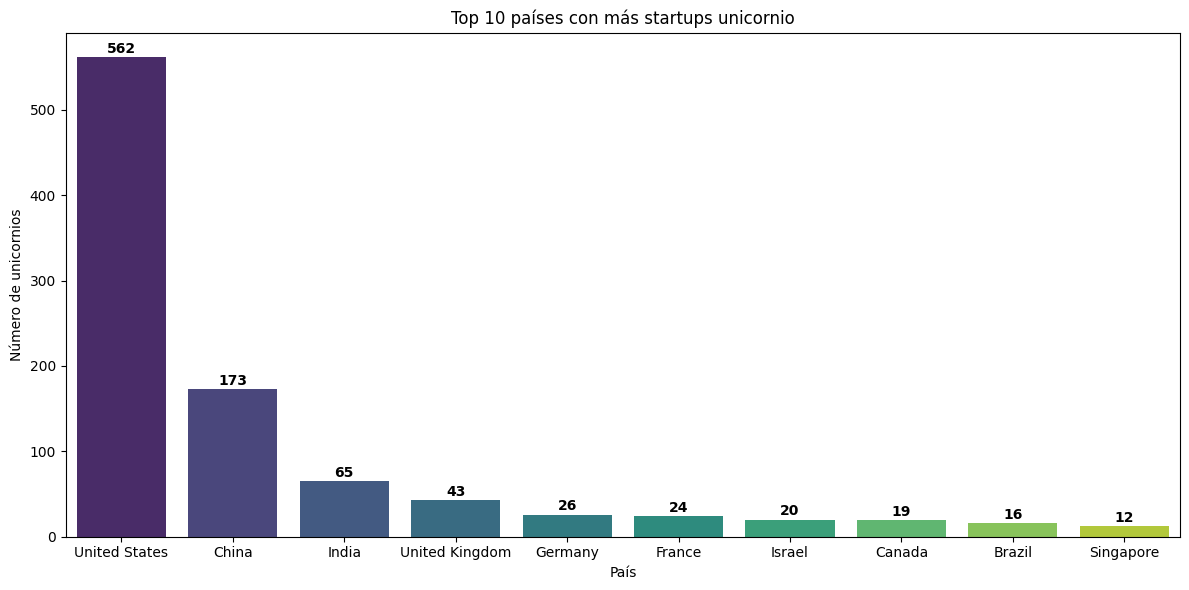

In [22]:
# GRAFICAMOS EL TOP DE LOS 10 PRIMEROS PAISES CON MAS UNICORNIOS Y LO RECORREMOS PARA PODER COLOCAR LA CANTIDAD DE STARTUPS EN CADA BARRA
top_paises = df_base["Country"].value_counts().head(10)

plt.figure(figsize = (12,6))
ax = sns.barplot(x = top_paises.index, y = top_paises.values, palette = "viridis")

plt.title("Top 10 países con más startups unicornio")
plt.xlabel("País")
plt.ylabel("Número de unicornios")

for i, valor in enumerate(top_paises.values):
    ax.text(i, valor + 5, str(valor), color='black', ha = 'center', fontweight = 'bold')

plt.tight_layout();

In [23]:
# AHORA FILTRAMOS Y NOS QUEDAMOS CON LAS EMPRESAS FUNDADAS ENTRE EL 2010 Y EL 2022
df_2010_2022 = df_base[(df_base["Year Founded"] >= 2010) & (df_base["Year Founded"] <= 2022)]

In [24]:
# CONTAMOS LAS EMPRESAS POR SECTOR QUE EXISTEN EN ESE RANGO 
unicornios_por_sector = df_2010_2022["Industry"].value_counts()
unicornios_por_sector.head(10)

Industry
Fintech                                199
Internet software & services           166
E-commerce & direct-to-consumer         84
Artificial intelligence                 64
Health                                  63
Supply chain, logistics, & delivery     50
Other                                   46
Cybersecurity                           42
Data management & analytics             32
Mobile & telecommunications             30
Name: count, dtype: int64

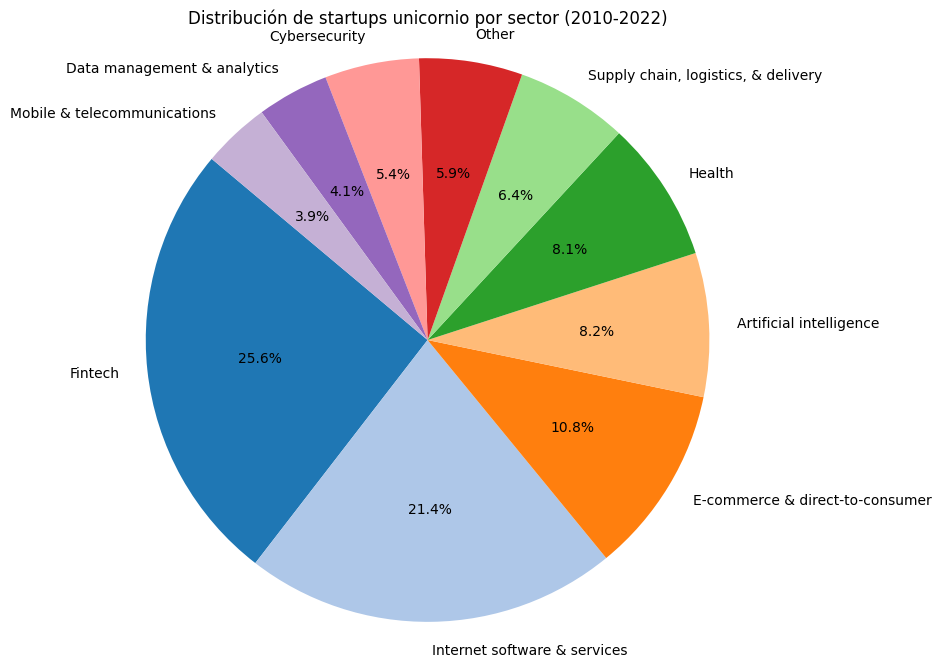

In [25]:
# GRAFICAMOS EN UN PIE PARA VISUALIZAR EL PORCENTAJE DE LA EMPRESA CON EL SECTOR MAS DOMINANTE
top_sectores = unicornios_por_sector.head(10)

plt.figure(figsize=(8,8))
plt.pie(top_sectores, labels=top_sectores.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title("Distribución de startups unicornio por sector (2010-2022)")
plt.axis('equal');

In [26]:
df_base[['Company', 'Year Founded', 'Date Joined', 'Years to Unicorn']].head()

,Company,Year Founded,Date Joined,Years to Unicorn
0,Bytedance,2012,2017-04-07,5
1,SpaceX,2002,2012-12-01,10
2,SHEIN,2008,2018-07-03,10
3,Stripe,2010,2014-01-23,4
4,Klarna,2005,2011-12-12,6


In [27]:
# SACAMOS LA MEDIA Y LA MEDIANA PARA SABER EL PROMEDIO EN QUE UNA COMPAÑIA SE CONVIERTE EN UNICORNIO. LA MEDIANA LA USAMOS POR SI ACASO HAY VALORES EXTREMOS 
media = df_base['Years to Unicorn'].mean()
mediana = df_base['Years to Unicorn'].median()

print(f"Media: {media:.2f} años")
print(f"Mediana: {mediana:.2f} años")

Media: 7.00 años
Mediana: 6.00 años


In [28]:
# HACEMOS UN FILTRO SUMANDO LAS EMPRESAS MENOR O IGUAL A 6 Y SACAMOS EL PORCENTAJE PARA REAFIRMAR LA HIPOTESIS
cumplen_condicion = (df_base['Years to Unicorn'] <= 6).sum()
total_empresas = df_base.shape[0]
porcentaje = (cumplen_condicion / total_empresas) * 100

print(f"{cumplen_condicion} de {total_empresas} startups ({porcentaje:.2f}%) llegaron al estatus unicornio en ≤ 6 años.")

604 de 1074 startups (56.24%) llegaron al estatus unicornio en ≤ 6 años.


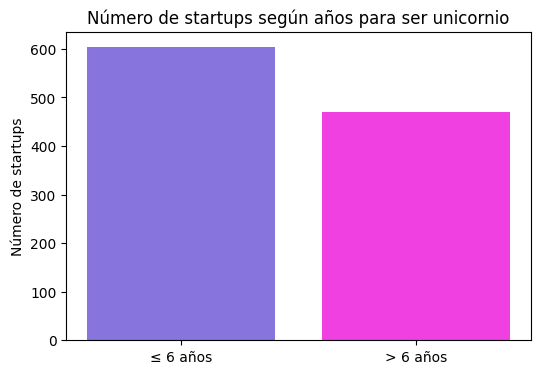

In [29]:
# GRAFICAMOS PARA VER CUANTAS EMPRESAS CUMPLEN CON LA HIPOTESIS
cumplen = cumplen_condicion
no_cumplen = total_empresas - cumplen_condicion

plt.figure(figsize=(6,4))
plt.bar(["≤ 6 años", "> 6 años"], [cumplen, no_cumplen], color =["#8874DD", "#F040E1"])
plt.ylabel("Número de startups")
plt.title("Número de startups según años para ser unicornio");

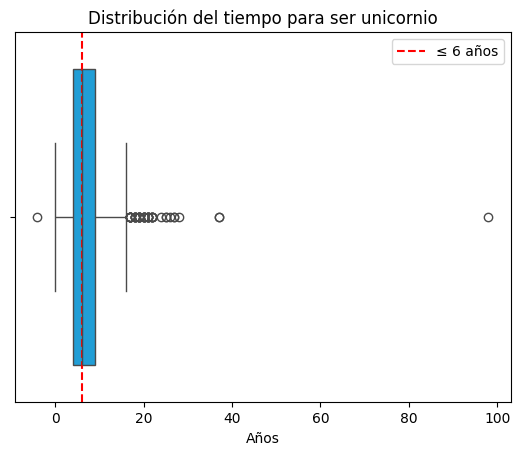

In [30]:
sns.boxplot(x = df_base['Years to Unicorn'], color="#03A9F4")
plt.axvline(6, color="red", linestyle="--", label="≤ 6 años")
plt.title("Distribución del tiempo para ser unicornio")
plt.xlabel("Años")
plt.legend()
plt.show()

In [31]:
# OBSERVAMOS QUE HAY UN VALOR MUY EXTREMO DECIDIMOS QUE HACER CON EL PORQUE PUEDE ESTAR AFECTANDO LA MEDIA 
df_base['Year Founded'].min()

np.int64(1919)

In [32]:
df_base[df_base['Year Founded'] == df_base['Year Founded'].min()]

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Years to Unicorn
189,Otto Bock HealthCare,$4B,2017-06-24,Health,Duderstadt,Germany,Europe,1919,$0M,EQT Partners,98


In [33]:
# SE EXCLUYE OTTO BOCK HEALTHCARE (98 años) POR SER UN OUTLIER EXTREMO, NO SIGUE EL PATRON TIPICO DE UNA STARTUP MODERNA
df_filtrado = df_base[df_base['Years to Unicorn'] < 50]

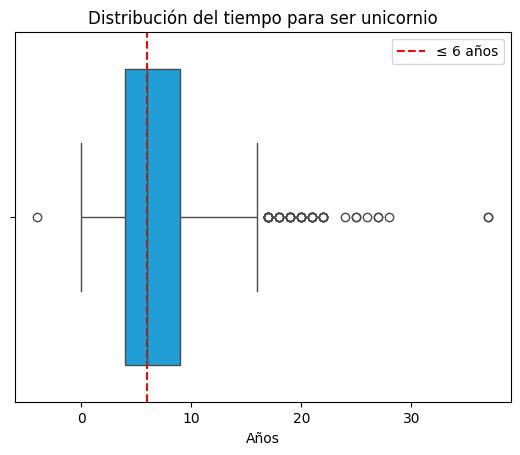

In [34]:
# VOLVEMOS A SACAR EL BOXPLOT CON EL FILTRO
sns.boxplot(x = df_filtrado['Years to Unicorn'], color="#03A9F4")
plt.axvline(6, color="red", linestyle="--", label="≤ 6 años")
plt.title("Distribución del tiempo para ser unicornio")
plt.xlabel("Años")
plt.legend()
plt.show()

In [35]:
# VOLVEMOS A SACAR LA METRICAS PARA VER COMO AFECTABA EL OUTLIER EXTREMO A NUESTRAS METRICAS
media = df_filtrado['Years to Unicorn'].mean()
mediana = df_filtrado['Years to Unicorn'].median()

print(f"Media: {media:.2f} años")
print(f"Mediana: {mediana:.2f} años")

Media: 6.92 años
Mediana: 6.00 años


In [36]:
cumplen_condicion = (df_filtrado['Years to Unicorn'] <= 6).sum()
total_empresas = df_filtrado.shape[0]
porcentaje = (cumplen_condicion / total_empresas) * 100

print(f"{cumplen_condicion} de {total_empresas} startups ({porcentaje:.2f}%) llegaron al estatus unicornio en ≤ 6 años.")

604 de 1073 startups (56.29%) llegaron al estatus unicornio en ≤ 6 años.


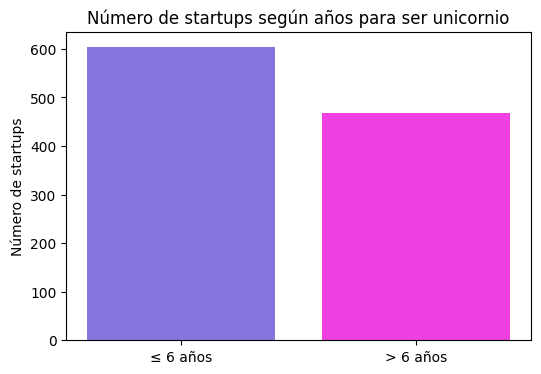

In [37]:
cumplen = cumplen_condicion
no_cumplen = total_empresas - cumplen_condicion

plt.figure(figsize=(6,4))
plt.bar(["≤ 6 años", "> 6 años"], [cumplen, no_cumplen], color =["#8874DD", "#F040E1"])
plt.ylabel("Número de startups")
plt.title("Número de startups según años para ser unicornio");

In [38]:
#AHORA QUEREMOS COMPROBAR EL IMPACTO QUE TIENEN ESTAS EMPRESAS EN EL PIB Y IMPORTAMOS LOS CSV CORRESPONDIENTES DE LAS 3 EMPRESAS CON MAS STARTUPS UNICORNIOS
df_usa = pd.read_csv(r'C:\Users\Gilberto\Desktop\proyecto-unicornios\data\Estados Unidos_ Producto interior bruto (2023).csv')

In [39]:
df_usa.head(3)

,Entity DCID,Entity properties isoCode,Entity properties name,Variable DCID,Variable observation date,Variable observation metadata importName,Variable observation metadata provenanceUrl,Variable observation metadata scalingFactor,Variable observation metadata unit,Variable observation metadata unitDisplayName,Variable observation value,Variable properties name
0,country/USA,US,United States of America,Amount_EconomicActivity_GrossDomesticProductio...,1960,WorldDevelopmentIndicators,https://datacatalog.worldbank.org/dataset/worl...,NaN,USDollar,USD,5.419886e+11,Nominal GDP
1,country/USA,US,United States of America,Amount_EconomicActivity_GrossDomesticProductio...,1961,WorldDevelopmentIndicators,https://datacatalog.worldbank.org/dataset/worl...,NaN,USDollar,USD,5.619403e+11,Nominal GDP
2,country/USA,US,United States of America,Amount_EconomicActivity_GrossDomesticProductio...,1962,WorldDevelopmentIndicators,https://datacatalog.worldbank.org/dataset/worl...,NaN,USDollar,USD,6.036394e+11,Nominal GDP


In [40]:
df_usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 12 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Entity DCID                                    64 non-null     object 
 1   Entity properties isoCode                      64 non-null     object 
 2   Entity properties name                         64 non-null     object 
 3   Variable DCID                                  64 non-null     object 
 4   Variable observation date                      64 non-null     int64  
 5   Variable observation metadata importName       64 non-null     object 
 6   Variable observation metadata provenanceUrl    64 non-null     object 
 7   Variable observation metadata scalingFactor    0 non-null      float64
 8   Variable observation metadata unit             64 non-null     object 
 9   Variable observation metadata unitDisplayName  64 non-nu

In [41]:
df_usa_pib_2022 = df_usa[df_usa['Variable observation date'] == 2022]

In [42]:
df_usa_pib_2022

,Entity DCID,Entity properties isoCode,Entity properties name,Variable DCID,Variable observation date,Variable observation metadata importName,Variable observation metadata provenanceUrl,Variable observation metadata scalingFactor,Variable observation metadata unit,Variable observation metadata unitDisplayName,Variable observation value,Variable properties name
62,country/USA,US,United States of America,Amount_EconomicActivity_GrossDomesticProductio...,2022,WorldDevelopmentIndicators,https://datacatalog.worldbank.org/dataset/worl...,NaN,USDollar,USD,2.600689e+13,Nominal GDP


In [43]:
# SOBREESCRIBIMOS NUESTRA VARIABLE PARA QUEDARNOS SOLO CON LAS COLUMNAS QUE NOS INTERESAN Y HACEMOS LO MISMO CON LAS SIGUIENTES 2 EMPRESAS
df_usa_pib_2022 = df_usa_pib_2022[['Entity properties name', 'Variable observation value']]

In [44]:
df_usa_pib_2022

,Entity properties name,Variable observation value
62,United States of America,2.600689e+13


In [45]:
df_india = pd.read_csv(r'C:\Users\Gilberto\Desktop\proyecto-unicornios\data\India_ Producto interior bruto (2023).csv')

In [46]:
df_india.tail(3)

,Entity DCID,Entity properties isoCode,Entity properties name,Variable DCID,Variable observation date,Variable observation metadata importName,Variable observation metadata provenanceUrl,Variable observation metadata scalingFactor,Variable observation metadata unit,Variable observation metadata unitDisplayName,Variable observation value,Variable properties name
61,country/IND,IN,India,Amount_EconomicActivity_GrossDomesticProductio...,2021,WorldDevelopmentIndicators,https://datacatalog.worldbank.org/dataset/worl...,NaN,USDollar,USD,3.167271e+12,Nominal GDP
62,country/IND,IN,India,Amount_EconomicActivity_GrossDomesticProductio...,2022,WorldDevelopmentIndicators,https://datacatalog.worldbank.org/dataset/worl...,NaN,USDollar,USD,3.353470e+12,Nominal GDP
63,country/IND,IN,India,Amount_EconomicActivity_GrossDomesticProductio...,2023,WorldDevelopmentIndicators,https://datacatalog.worldbank.org/dataset/worl...,NaN,USDollar,USD,3.567552e+12,Nominal GDP


In [47]:
df_india_pib_2022 = df_india[df_india['Variable observation date'] == 2022]

In [48]:
df_india_pib_2022

,Entity DCID,Entity properties isoCode,Entity properties name,Variable DCID,Variable observation date,Variable observation metadata importName,Variable observation metadata provenanceUrl,Variable observation metadata scalingFactor,Variable observation metadata unit,Variable observation metadata unitDisplayName,Variable observation value,Variable properties name
62,country/IND,IN,India,Amount_EconomicActivity_GrossDomesticProductio...,2022,WorldDevelopmentIndicators,https://datacatalog.worldbank.org/dataset/worl...,NaN,USDollar,USD,3.353470e+12,Nominal GDP


In [49]:
df_india_pib_2022 = df_india_pib_2022[['Entity properties name', 'Variable observation value']]

In [50]:
df_india_pib_2022

,Entity properties name,Variable observation value
62,India,3.353470e+12


In [51]:
df_china = pd.read_csv(r'C:\Users\Gilberto\Desktop\proyecto-unicornios\data\República Popular China_ Producto interior bruto (2023).csv')

In [52]:
df_china.tail(3)

,Entity DCID,Entity properties isoCode,Entity properties name,Variable DCID,Variable observation date,Variable observation metadata importName,Variable observation metadata provenanceUrl,Variable observation metadata scalingFactor,Variable observation metadata unit,Variable observation metadata unitDisplayName,Variable observation value,Variable properties name
61,country/CHN,CN,China,Amount_EconomicActivity_GrossDomesticProductio...,2021,WorldDevelopmentIndicators,https://datacatalog.worldbank.org/dataset/worl...,NaN,USDollar,USD,1.782046e+13,Nominal GDP
62,country/CHN,CN,China,Amount_EconomicActivity_GrossDomesticProductio...,2022,WorldDevelopmentIndicators,https://datacatalog.worldbank.org/dataset/worl...,NaN,USDollar,USD,1.788178e+13,Nominal GDP
63,country/CHN,CN,China,Amount_EconomicActivity_GrossDomesticProductio...,2023,WorldDevelopmentIndicators,https://datacatalog.worldbank.org/dataset/worl...,NaN,USDollar,USD,1.779478e+13,Nominal GDP


In [53]:
df_china_pib_2022 = df_china[df_china['Variable observation date'] == 2022]

In [54]:
df_china_pib_2022

,Entity DCID,Entity properties isoCode,Entity properties name,Variable DCID,Variable observation date,Variable observation metadata importName,Variable observation metadata provenanceUrl,Variable observation metadata scalingFactor,Variable observation metadata unit,Variable observation metadata unitDisplayName,Variable observation value,Variable properties name
62,country/CHN,CN,China,Amount_EconomicActivity_GrossDomesticProductio...,2022,WorldDevelopmentIndicators,https://datacatalog.worldbank.org/dataset/worl...,NaN,USDollar,USD,1.788178e+13,Nominal GDP


In [55]:
df_china_pib_2022 = df_china_pib_2022[['Entity properties name', 'Variable observation value']]

In [56]:
df_china_pib_2022

,Entity properties name,Variable observation value
62,China,1.788178e+13


In [57]:
#EN EL PROCESO BORRAMOS LA COLUMNA AÑOS, LA VOLVEMOS A CREAR POR SI LA NECESITAMOS MAS ADELANTE 
df_usa_pib_2022['Year'] = 2022
df_china_pib_2022['Year'] = 2022
df_india_pib_2022['Year'] = 2022

C:\Users\Gilberto\AppData\Local\Temp\ipykernel_18220\927520900.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usa_pib_2022['Year'] = 2022
C:\Users\Gilberto\AppData\Local\Temp\ipykernel_18220\927520900.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_china_pib_2022['Year'] = 2022
C:\Users\Gilberto\AppData\Local\Temp\ipykernel_18220\927520900.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [58]:
df_usa_pib_2022

,Entity properties name,Variable observation value,Year
62,United States of America,2.600689e+13,2022


In [59]:
df_pib_concat = pd.concat([df_usa_pib_2022, df_china_pib_2022, df_india_pib_2022], ignore_index = True)

In [60]:
#QUEREMOS JUNTAR LOS DATOS FILTRADOS PARA COMPROBAR NUESTRA HIPOTESIS. QUITAMOS TODOS LOS AÑOS ANTERIORES Y POSTERIORES Y NOS QUEDAMOS SOLO CON LAS DEL 2022
df_pib_concat

,Entity properties name,Variable observation value,Year
0,United States of America,2.600689e+13,2022
1,China,1.788178e+13,2022
2,India,3.353470e+12,2022


In [61]:
# QUEREMOS RENOMBRAR ALGUNAS COLUMNAS
df_pib_concat = df_pib_concat.rename(columns={
    'Entity properties name': 'Country',
    'Variable observation value': 'PIB'
})

In [62]:
df_pib_concat

,Country,PIB,Year
0,United States of America,2.600689e+13,2022
1,China,1.788178e+13,2022
2,India,3.353470e+12,2022


In [63]:
# PARA PODER USAR ESTE DATAFRAME CON EL DATAFRAME PRINCIPAL NECESITAMOS QUE EL NOMBRE DE LOS PAISES SEAN IGUAL A LOS DEL OTRO DF
df_pib_concat['Country'] = df_pib_concat['Country'].replace({'United States of America': 'United States'})

In [64]:
df_pib_concat

,Country,PIB,Year
0,United States,2.600689e+13,2022
1,China,1.788178e+13,2022
2,India,3.353470e+12,2022


In [65]:
# FILTRO SOLO POR LOS PAISES QUE ME INTERESAN
paises_interes = ['United States', 'China', 'India']

df_unicornios_filtrado = df_base[df_base['Country'].isin(paises_interes)]

In [66]:
df_unicornios_filtrado.tail(10)

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Years to Unicorn
1062,Womai,$1B,2015-10-12,E-commerce & direct-to-consumer,Beijing,China,Asia,2009,$330M,"SAIF Partners China, Baidu, IDG Capital",6
1063,Wrapbook,$1B,2021-11-10,Fintech,New York,United States,North America,2018,$131M,"Equal Ventures, Uncork Capital, Andreessen Hor...",3
1065,XForcePlus,$1B,2021-06-01,Internet software & services,Shanghai,China,Asia,2015,$200M,"Eastern Bell Capital, Danhua Capital, MSA Capital",6
1066,YH Global,$1B,2017-09-21,"Supply chain, logistics, & delivery",Shenzhen,China,Asia,1997,$182M,"Co-Energy Finance, Grandland",20
1067,YipitData,$1B,2021-12-06,Internet software & services,New York,United States,North America,2008,$492M,"RRE Ventures+, Highland Capital Partners, The ...",13
1068,Yunxuetang,$1B,2021-03-29,Edtech,Suzhou,China,Asia,2011,$389M,"Matrix Partners China, Sequoia Capital China, ...",10
1069,Zhaogang,$1B,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital",5
1070,Zhuan Zhuan,$1B,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings",2
1071,Zihaiguo,$1B,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ...",3
1073,Zwift,$1B,2020-09-16,E-commerce & direct-to-consumer,Long Beach,United States,North America,2014,$620M,"Novator Partners, True, Causeway Media Partners",6


In [67]:
# SUSTITUIMOS EL SIMBOLO DEL DOLAR PARA QUE PODAMOS TRABAJAR CON LOS NUMEROS Y APARTE LA M DEL FINAL
def convertir_valoracion(val):
    val = val.replace('$', '').upper()
    if 'B' in val:
        return float(val.replace('B', '')) * 1e9
    elif 'M' in val:
        return float(val.replace('M', '')) * 1e6
    else:
        return float(val)

df_unicornios_filtrado['Valuation_num'] = df_unicornios_filtrado['Valuation'].apply(convertir_valoracion)

C:\Users\Gilberto\AppData\Local\Temp\ipykernel_18220\2493093183.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unicornios_filtrado['Valuation_num'] = df_unicornios_filtrado['Valuation'].apply(convertir_valoracion)


In [68]:
# SACAMOS LA SUMA TOTAL DEL VALOR DE LAS STARTUPS POR PAISES
suma_valoracion_pais = df_unicornios_filtrado.groupby('Country')['Valuation_num'].sum().reset_index()

In [69]:
suma_valoracion_pais

,Country,Valuation_num
0,China,6.960000e+11
1,India,1.960000e+11
2,United States,1.933000e+12


In [70]:
# AHORA JUNTAMOS PARA PODER HACER LA OPERACION
df_analisis = pd.merge(df_pib_concat, suma_valoracion_pais, on='Country')

In [71]:
# ESTO LO ESTAMOS HACIENDO PORQUE NO TODAS LAS STARTUPS UNICORNIOS MUESTRAN EL APORTE Y LA GANANCIA
# QUEREMOS SACAR UN APROXIMADO SUMANDO EL VALOR TOTAL DE LAS STARTUPS DE UN PAIS Y HACIENDO UNA FORMULA PARA 
# HACER UNA ESTIMACION DE CUANTO CONTRIBUYE EN EL PIB

In [72]:
df_analisis

,Country,PIB,Year,Valuation_num
0,United States,2.600689e+13,2022,1.933000e+12
1,China,1.788178e+13,2022,6.960000e+11
2,India,3.353470e+12,2022,1.960000e+11


In [73]:
# CREAMOS LA COLUMNA PARA INTEGRAR EL VALOR EN PORCENTAJE DE LA CONTRIBUCION DE LOS UNICORNIOS AL PIB
df_analisis['Contribucion_Unicornios_PIB'] = (df_analisis['Valuation_num'] / df_analisis['PIB']) * 100

In [74]:
df_analisis

,Country,PIB,Year,Valuation_num,Contribucion_Unicornios_PIB
0,United States,2.600689e+13,2022,1.933000e+12,7.432645
1,China,1.788178e+13,2022,6.960000e+11,3.892229
2,India,3.353470e+12,2022,1.960000e+11,5.844691


In [75]:
# QUEREMOS SABER EL NUMERO EXACTO DEL APORTE EN DOLARES, PORQUE EN MIS DATAFRAME ME APARECE EN NOTACION CIENTIFICA LO RECORREMOS Y FORMATEAMOS PARA QUE ME DE LA VISTA EN DOLARES
for idx, row in df_analisis.iterrows():
    pais = row['Country']
    valor = row['Valuation_num']
    print(f"{pais}: ${valor:,.0f}")

United States: $1,933,000,000,000
China: $696,000,000,000
India: $196,000,000,000


Text(0.5, 1.0, 'PIB y Valoración Total de Unicornios por País (2022)')

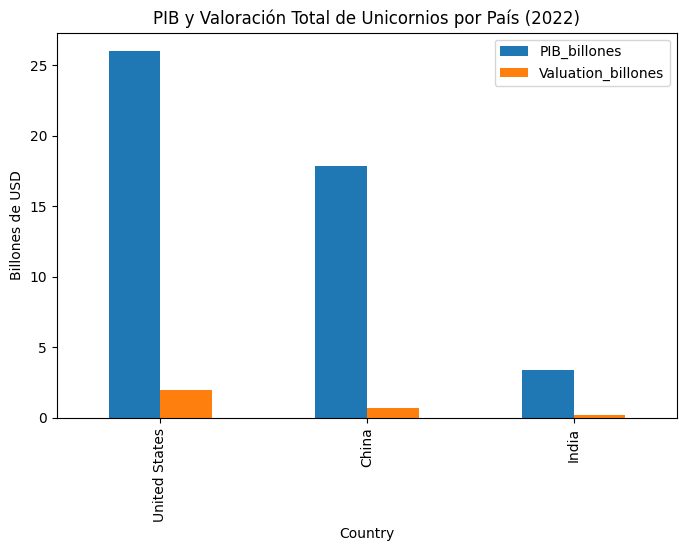

In [76]:
# GRAFICAMOS PARA SABER CUANTO CONTRIBUYE COMPARANDOLO JUNTO AL PIB, A ESA GRAFICA AGREGAREMOS EL VALOR TOTAL EN DOLARES PARA VISUALIZAR EL MONTO 
df_analisis['PIB_billones'] = df_analisis['PIB'] / 1e12
df_analisis['Valuation_billones'] = df_analisis['Valuation_num'] / 1e12

df_analisis.set_index('Country')[['PIB_billones', 'Valuation_billones']].plot(kind = 'bar', figsize = (8,5))

plt.ylabel('Billones de USD')
plt.title('PIB y Valoración Total de Unicornios por País (2022)')

In [77]:
# AHORA HACEMOS UN FILTRO DE LAS STARTUPS QUE LLEGARON A LA CATEGORIA DE UNICORNIOS DESDE EL 2013 HASTA EL 2022
df_filtrado = df_base[(df_base['Date Joined'].dt.year >= 2013) & (df_base['Date Joined'].dt.year <= 2022)]

In [78]:
df_filtrado.head(5)

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Years to Unicorn
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",5
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",10
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",4
5,Canva,$40B,2018-01-08,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat...",6
6,Checkout.com,$40B,2019-05-02,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST...",7


In [79]:
df_filtrado.tail(5)

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Years to Unicorn
1069,Zhaogang,$1B,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital",5
1070,Zhuan Zhuan,$1B,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings",2
1071,Zihaiguo,$1B,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ...",3
1072,Zopa,$1B,2021-10-19,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North...",16
1073,Zwift,$1B,2020-09-16,E-commerce & direct-to-consumer,Long Beach,United States,North America,2014,$620M,"Novator Partners, True, Causeway Media Partners",6


In [80]:
unicorns_por_ano = df_filtrado['Date Joined'].dt.year.value_counts().sort_index()

In [81]:
# CONTAMOS CUANTAS STARTUPS ALCANZARON EL ESTATUS UNICORNIO EN CADA AÑO
unicorns_por_ano

Date Joined
2013      3
2014     13
2015     35
2016     21
2017     44
2018    103
2019    104
2020    108
2021    520
2022    116
Name: count, dtype: int64

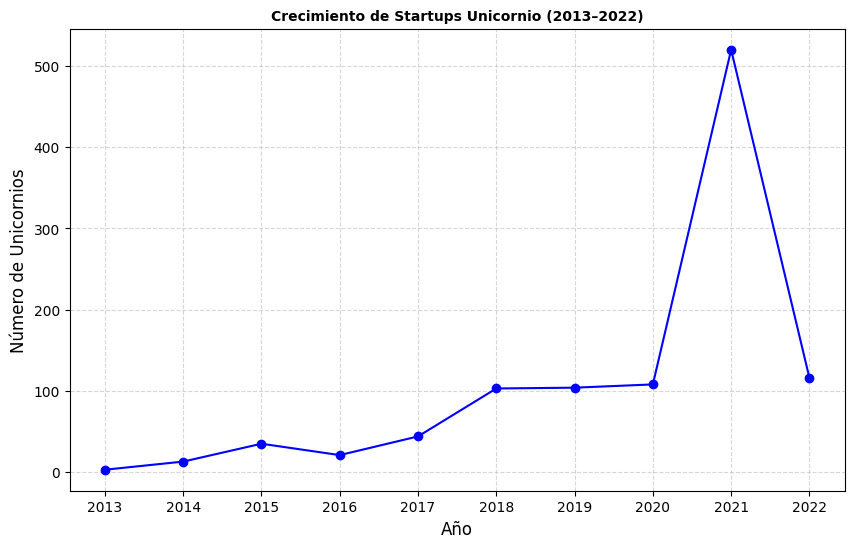

In [82]:
# LO GRAFICAMOS PARA VISUALIZAR COMO FUE EL CRECIMIENTO
plt.figure(figsize = (10,6))
plt.plot(unicorns_por_ano.index, unicorns_por_ano.values, marker = 'o', linestyle = '-', color = 'blue')
plt.title('Crecimiento de Startups Unicornio (2013–2022)', fontsize = 10, fontweight = 'bold')
plt.xlabel('Año', fontsize = 12)
plt.ylabel('Número de Unicornios', fontsize = 12)
plt.grid(True, linestyle ='--', alpha = 0.5)
plt.xticks(unicorns_por_ano.index);